# Normal modes

When multiple oscillators are coupled together, they can exchange energy and their motion becomes more complex. For example, consider two masses m1 and m2 connected by springs with spring constants k1, k2, and k3 as shown below:

┌ Info: Saved animation to /home/jose/Documents/STUDY/PhD/ClassicalMech/notes/03_vibrations/oscillators.gif
└ @ Plots /home/jose/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/PhD/ClassicalMech/notes/03_vibrations/oscillators.gif")
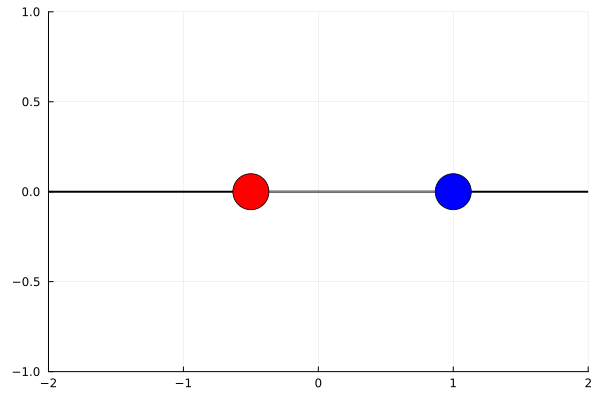

In [2]:

using Plots
const m1 = 1.0
const m2 = 1.0
const k1 = 1.0
const k2 = 1.0
const k12 = 0.5
const dt = 0.01
const t_end = 30.0

x1 = 1.0
v1 = 0.0
x2 = -0.5
v2 = 0.0

X1 = Float64[]
X2 = Float64[]
T = Float64[]

t = 0.0
while t < t_end
    push!(X1, x1)
    push!(X2, x2)
    push!(T, t)
    a1 = (-k1*x1 - k12*(x1 - x2))/m1
    v1 += dt*a1
    x1 += dt*v1
    a2 = (-k2*x2 - k12*(x2 - x1))/m2
    v2 += dt*a2
    x2 += dt*v2
    t += dt
end
anim = @animate for i in 1:length(T)
    plot([-2, 2], [0, 0], linewidth=2, linecolor=:black, legend=false, xlims=(-2,2), ylims=(-1,1))
    plot!([X1[i], X2[i]], [0, 0], linewidth=2, linecolor=:gray)
    scatter!([X1[i]], [0], markersize=20, markercolor=:blue)
    scatter!([X2[i]], [0], markersize=20, markercolor=:red)
end
gif(anim, "oscillators.gif", fps = 35)


The equations of motion for the two masses are:


$$[m_1 \frac{d^2 x_1}{dt^2} = -k_1 x_1 + k_2 (x_2 - x_1)],\quad
[m_2 \frac{d^2 x_2}{dt^2} = -k_3 x_2 - k_2 (x_2 - x_1)]$$

The trick is to write the system in matrix form: 

$$[\begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix} \begin{bmatrix} \ddot{x}_1 \\ \ddot{x}_2 \end{bmatrix} = - \begin{bmatrix} V_1 + V_2 & -V_2 \\ -V_2 & V_2 + V_3 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}]$$

Or in general:

$$T_{ij}\ddot \eta_j = -V_{ij}\eta_j$$

Where $T_{ij}$ is the kinetic energy matrix and $V_{ij}$ is the potential energy matrix.

In general, the solutions to the equation take the form:

$$\eta_j = \eta_j^0 e^{i\omega t}$$

Where $\eta_j^0$ is the amplitude of the oscillation and $\omega$ is the frequency of the oscillation.

Notably this makes the equation in matrix form:

$$T_{ij}\omega^2 \eta_j = -V_{ij}\eta_j \quad \Rightarrow \quad (V_{ij} - \omega^2 T_{ij})\eta_j = 0$$

Therefor, one can find the eigenvalues of the matrix $(V_{ij} - \omega^2 T_{ij})$ to find the frequencies of the oscillations (this is paricularly easy when $T_{ij}$ is diagonal).

The eigenvectors of the matrix $(V_{ij} - \omega^2 T_{ij})$ are the static normal modes of the system, thus the actual time generalised coordinates can be written as:

$$\eta_{j}(t) = \sum_{i=1}^N \eta_{ij}^0 e^{i\omega_i t}$$

Where $\eta_{ij}^0$ is the amplitude of the $i$ th normal mode.

Note as well that the matrix containing all the eigenvectors (namely, $A$) diagonalizes both $T$ and $V$.

